# ISL - CHAPTER 3 - LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import operator
from scipy import optimize
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import math
import random
import seaborn as sns; sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# consultation reference

# https://www.statsmodels.org/devel/example_formulas.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Conceptual - number 4

- First some exploring throughout conceptual construction of the exercise. This exploring was conducted to also understand better applied exercise 13 from this chapter.

In [ ]:
np.random.seed(2)
# standard deviation = sqrt(variance)
# here we could also use mu, sigma instead of loc and scale, but with scale we must remember to take  sqrt first

x_new = np.random.normal(loc=0.0, scale= np.sqrt(1), size=100)
eps_new = np.random.normal(loc=0.0, scale= np.sqrt(0.001), size=100)
y_new = -1 + (0.5*x) + eps_new

In [ ]:
reg = LinearRegression().fit(x_new.reshape(-1,1), y_new)

y_pred = reg.predict(x_new.reshape(-1,1))

In [ ]:
print("regression intercept: ",reg.intercept_)
print("regression coef: ",reg.coef_)

regression intercept:  -0.9958338428687539
regression coef:  [0.5010682]


In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_new.reshape(-1,1))

cubic_model = LinearRegression().fit(x_poly, y_new)
y_poly_pred = cubic_model.predict(x_poly)

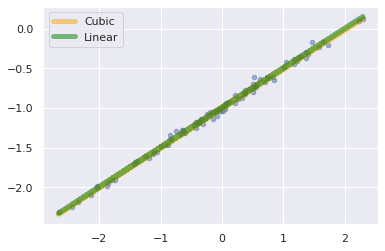

In [ ]:
plt.scatter(x_new, y_new, s=20, alpha = 0.5)
plt.plot(x_new, y_poly_pred, 'orange', label = 'Cubic', alpha = 0.5, linewidth = 5);
plt.plot(x_new, y_pred, 'green', label = 'Linear', alpha = 0.5,linewidth = 5);
plt.legend();

- 4. I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. 
Y = β0 + β1X + β2X2 + β3X3 + ϵ.

- (a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.

**answer:** 

- Regarding training RSS we would expect cubic to be lower beacause of its flexibility in fitting closer to data points of training set.

- (b) Answer (a) using test rather than training RSS.


**answer:**

- Regarding the test set we would expect the linear regression to be lower, now that we have new data points, a Linear Regression would generalize better the fitting throughout the points. The cubic regression with new data points wouldn't be able to generalize like so and we would see a overfitting, meaning that the cubic regression represented well the training set but not the test set.

- (c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.


**answer:**

- I believe that would be the same case, if we use a cubic regression for the training data, that would fit more closely our points, resulting in lower RSS.

- (d) Answer (c) using test rather than training RSS.

- In this case I believe we don't have enough information. Let's suppose a data drift occurs, and despite our cubic regression fitted better the training set, once we got to the test set, the relationship between our variables changed and therefore that regression could no longer represent the best fit.

## Applied - number 13

13. In this exercise you will create some simulated data and will fit simple
linear regression models to it.

- Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results

In [ ]:
np.random.seed(1)

- (a) Using the rnorm() function, create a **vector, x**, containing 100
observations drawn from a N(0, 1) distribution. 

This represents a feature, X.

In [ ]:
# once again, if we choose loc and scale --> standard deviation = sqrt(variance), otherwise (mu, sigma --> 0,1)

variance_x = 1
x = np.random.normal(loc=0.0, scale= np.sqrt(variance_x), size=100)

- (b) Using the rnorm() function, create a **vector, eps,** containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [ ]:
variance_eps = 0.25
eps = np.random.normal(loc=0.0, scale= np.sqrt(variance_eps), size=100)

- (c) Using x and eps, generate a **vector y** according to the model:

 `Y = −1+0.5X + ϵ`

In [ ]:
y = -1 + 0.5*x + eps

* What is the length of the vector y? 

In [ ]:
len(y)

100

- What are the values of β0 and β1 in this linear model? 

`β0 = -1 e β1 = 0.5`

- (d) Create a scatterplot displaying the relationship between x and
y. 

Comment on what you observe.

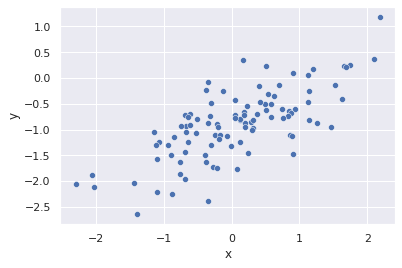

In [ ]:
sns.scatterplot(x = x,y = y);
plt.xlabel('x');
plt.ylabel('y');

The scatterplot depicted above, shows a linear relationship between (x,y) with some dispersion throughout the plot.

- (e) Fit a least squares linear model to predict y using x.

Comment on the model obtained. 

In [ ]:
# least square linear model (ols - statsmodels), we can either use 'formula' and 'data' and then fit or y,x and then fit
# model = sm.OLS(y,sm.add_constant(x)).fit() - option 1

In [ ]:
# to use 'y ~x' data must be a dataframe, so it doesn't return a slice error
model_lm = smf.ols(formula ='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()

In [ ]:
print(" summary model : ", model_lm.summary())

 summary model :                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.20e-17
Time:                        14:30:31   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047  

- How do βˆ0 and βˆ1 compare to β0 and β1?

In [ ]:
print("In this model, βˆ0 is {0:.3f} and βˆ1 is {1:.3f}".format(model_lm.params[0], model_lm.params[1]))

In this model, βˆ0 is -0.926 and βˆ1 is 0.548


In [ ]:
y_pred = model_lm.predict()
# actual values of y are defined by 'beta 0 + beta1 * x' --> '-1 + 0.5*x'
y_groundtruth = -1 + (0.5*x)

- (f) Display the least squares line on the scatterplot obtained in (d).

- Draw the population regression line on the plot, in a different color. (y_groundtruth)*

Use the legend() command to create an appropriate legend.

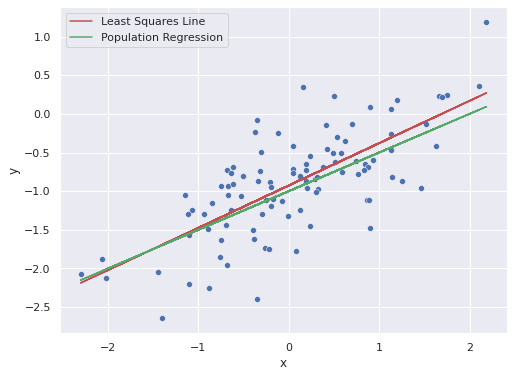

In [ ]:
plt.figure(figsize = (8,6))

ax = sns.scatterplot(x = x,y = y);
ax.set_xlabel('x');
ax.set_ylabel('y');
# population regression --> beta 0 + beta 1 * x
ax.plot(x, model_lm.params[1]*x + model_lm.params[0], 'r', label = 'Least Squares Line');
ax.plot(x, y_groundtruth, 'g', label = 'Population Regression');
ax.legend();

- (g) Now fit a polynomial regression model that predicts y using x
and x2. 

Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [ ]:
# to use 'y ~x' data must be a dataframe, so it doesn't return a slice error
model_poly = smf.ols(formula ='y ~ x + np.square(x)', data=pd.DataFrame({'x':x, 'y':y})).fit()

In [ ]:
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.83e-16
Time:                        14:30:32   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9325      0.058    -16.158   

- The R-Squared of both models (lm = 0.572 and poly = 0.576) are almost identical, which suggests no improvement of poly model in fitting our data.

###### obs: p-value also bigger than 0.05?

- (h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same.
 
You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). 

Describe your results

 summary model lm 2 :                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     441.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.40e-38
Time:                        14:30:32   Log-Likelihood:                -2.4337
No. Observations:                 100   AIC:                             8.867
Df Residuals:                      98   BIC:                             14.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9705      0.

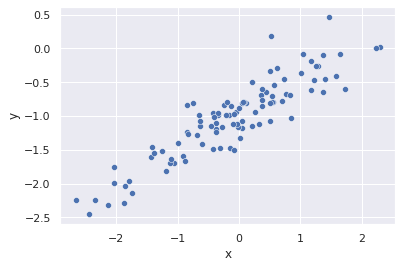

In [ ]:
np.random.seed(2)
# standard deviation = sqrt(variance)

variance_x_2 = 1
x = np.random.normal(loc=0.0, scale= np.sqrt(variance_x_2), size=100)

variance_eps_2 = 0.05
eps = np.random.normal(loc=0.0, scale= np.sqrt(variance_eps_2), size=100)
y = -1 + (0.5*x) + eps

sns.scatterplot(x = x, y = y);
plt.xlabel('x');
plt.ylabel('y');

form =  'y ~ x'
model_lm_2 = smf.ols(formula = form, data=pd.DataFrame({'x':x, 'y':y})).fit()

print(" summary model lm 2 : ", model_lm_2.summary())

y_pred_2 = model_lm_2.predict()

# actual values of y are defined by 'beta 0 + beta1 * x' --> '-1 + (0.5 * x)'
y_groundtruth_2 = -1 + (0.5*x)

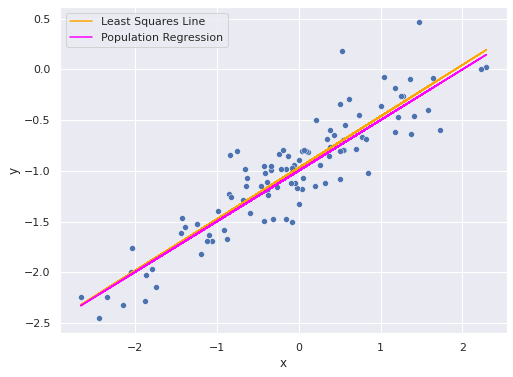

In [ ]:
plt.figure(figsize = (8,6))
ax2 = sns.scatterplot(x = x,y = y);
ax2.set_xlabel('x');
ax2.set_ylabel('y');

# population regression --> beta 0 + beta 1 * x
ax2.plot(x, model_lm_2.params[1]*x + model_lm_2.params[0], 'orange', label = 'Least Squares Line');
ax2.plot(x, y_groundtruth_2, 'magenta', label = 'Population Regression');
ax2.legend();

- (i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. 

The model (3.39) should remain the same. 

You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). 

Describe your results.

 summary model lm 2 :                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     47.06
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           6.25e-10
Time:                        14:30:33   Log-Likelihood:                -117.56
No. Observations:                 100   AIC:                             239.1
Df Residuals:                      98   BIC:                             244.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9068      0.

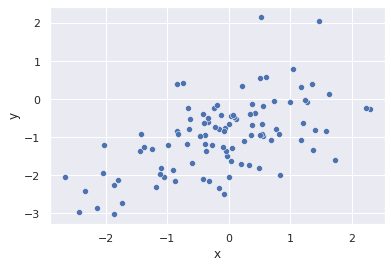

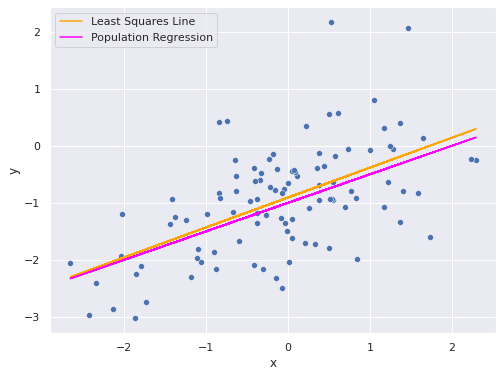

In [ ]:
np.random.seed(2)
# standard deviation = sqrt(variance)

# we can also use mu and sigma here --> x = np.random.normal(mu, sigma, size)
variance_x_2 = 1
x = np.random.normal(loc=0.0, scale= np.sqrt(variance_x_2), size=100)

variance_eps_2 = 0.50
eps = np.random.normal(loc=0.0, scale= np.sqrt(variance_eps_2), size=100)
y = -1 + (0.5*x) + eps

sns.scatterplot(x = x, y = y);
plt.xlabel('x');
plt.ylabel('y');

form =  'y ~ x'
model_lm_2 = smf.ols(formula = form, data=pd.DataFrame({'x':x, 'y':y})).fit()

print(" summary model lm 2 : ", model_lm_2.summary())

y_pred_2 = model_lm_2.predict()

# actual values of y are defined by 'beta 0 + beta1 * x' --> '-1 + (0.5 * x)'
y_groundtruth_2 = -1 + (0.5*x)

plt.figure(figsize = (8,6))
ax2 = sns.scatterplot(x = x,y = y);
ax2.set_xlabel('x');
ax2.set_ylabel('y');

# population regression --> beta 0 + beta 1 * x
ax2.plot(x, model_lm_2.params[1]*x + model_lm_2.params[0], 'orange', label = 'Least Squares Line');
ax2.plot(x, y_groundtruth_2, 'magenta', label = 'Population Regression');
ax2.legend();

- (j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? 

Comment on your results

DATASET ORIGINAL --> EPSILON 0.25

```
# ==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x              0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
```


DATASET LESS NOISE --> EPSILON 0.05
```
# ==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9705      0.025    -38.560      0.000      -1.020      -0.921
x              0.5076      0.024     21.016      0.000       0.460       0.555


```
DATASET MORE NOISE --> EPSILON 0.50

```
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9068      0.080    -11.393      0.000      -1.065      -0.749
x              0.5239      0.076      6.860      0.000       0.372       0.675
==============================================================================
```



